## Assigment 3

In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [2]:
set_nb_theme('onedork')

* ## Punto 1

In [3]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [4]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [5]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [6]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015,1759.0,1560.0,14230.0,Extrapolated,NaN


In [7]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')

In [8]:
    maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]

In [9]:
popwo = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('WORLD TOTAL')!=-1)].reset_index(drop=True)
popwo = popwo.dropna(subset=['pop_1'])
popwo = popwo.dropna(axis=1, how='any')

In [10]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [11]:
popwo = pd.wide_to_long(popwo, ['pop_'], i='Country', j='year').reset_index()
popwo

,Country,year,pop_
0,World Total,1,225820
1,World Total,1000,267330
2,World Total,1500,438428
3,World Total,1600,556148
4,World Total,1700,603490
...,...,...,...
67,World Total,2006,6.54021e+06
68,World Total,2007,6.61669e+06
69,World Total,2008,6.69483e+06
70,World Total,2009,6764086


In [12]:
popwo2 = popwo.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
popwo2

Country,World Total
year,
1,2.258200e+05
1000,2.673300e+05
1500,4.384280e+05
1600,5.561480e+05
1700,6.034900e+05
...,...
2006,6.540214e+06
2007,6.616689e+06
2008,6.694832e+06


In [13]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

Text(0, 0.5, 'Total World population')

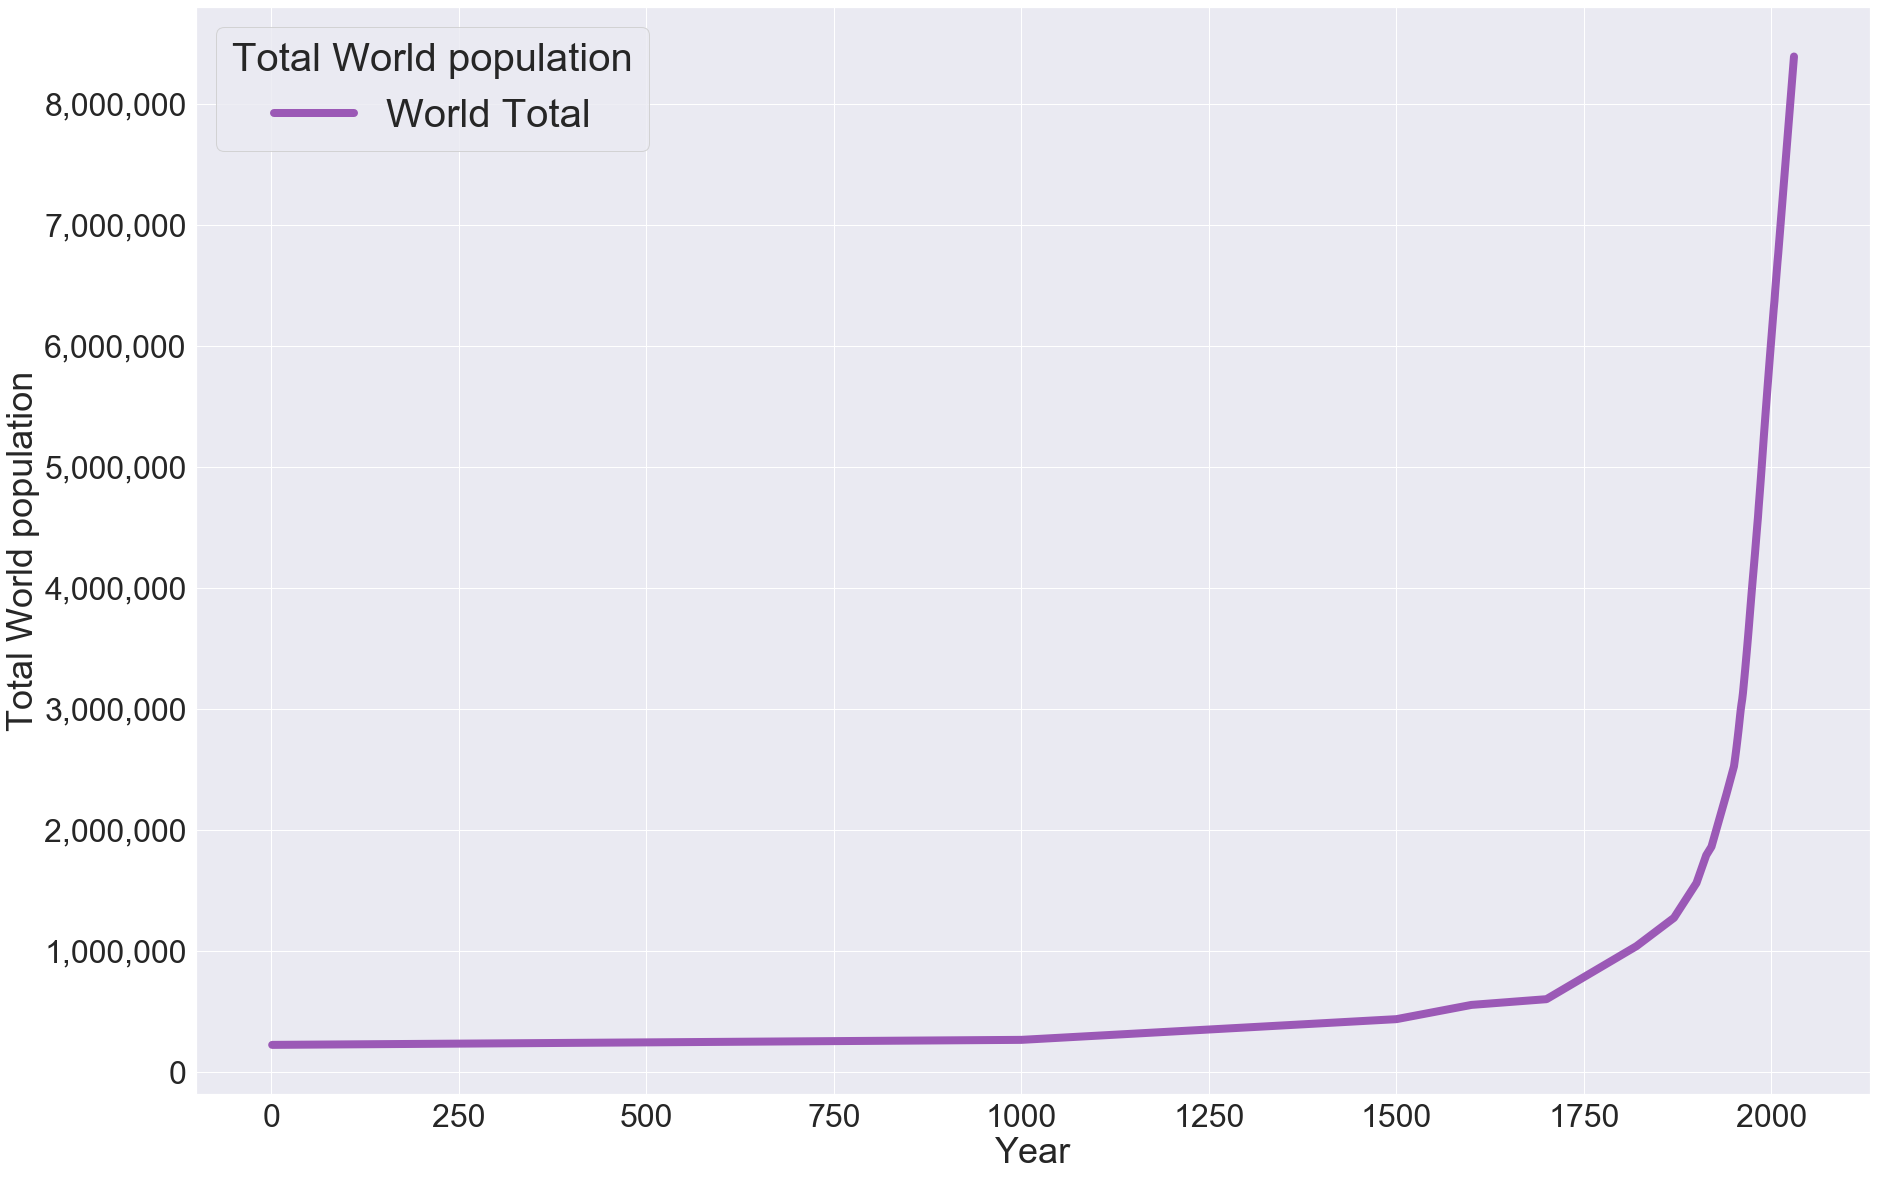

In [14]:
fig, ax = plt.subplots(figsize=(30,20))
popwo2.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Total World population", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total World population', fontsize=36)

* # Punto 2
* A)

In [15]:
if not os.path.exists(pathout + 'Datapopulationwb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Datapopularionwb.xls')

In [16]:
df = pd.read_excel(pathout + 'Datapopularionwb.xls', sheet_name="Data", skiprows=2)

df

In [17]:
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)

df

In [18]:
new_df = df.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)

In [19]:
new_df= new_df[[col for col in new_df.columns if str(col).startswith('2019.0')==False]]

new_df

In [20]:
new_df.loc['Suma X Años'] = new_df.sum(axis=0)

new_df

In [21]:
new_df1 = new_df.drop(new_df.index[0:264])

new_df1

In [22]:
new_df1.at['Suma X Años','Country Name']='World Total'

new_df1

In [23]:
Fdf = new_df1.T

Fdf

In [24]:
headers1 = Fdf.iloc[0]
Fdf  = pd.DataFrame(Fdf.values[1:], columns=headers1, index=Fdf.index[1:])

In [ ]:
Fdf

yr= list(range(1960,2018,1))

yr

print(Fdf)

Fdf.rename(index={0:1960,1:1961,2:1962,3:1963,4:1964,5:1965,6:1966,7:1967,8:1968,9:1969,10:1970,11:1971,
12:1972,
13:1973,
14:1974,
15:1975,
16:1976,
17:1977,
18:1978,
19:1979,
20:1980,
21:1981,
22:1982,
23:1983,
24:1984,
25:1985,
26:1986,
27:1987,
28:1988,
29:1989,
30:1990,
31:1991,
32:1992,
33:1993,
34:1994,
35:1995,
36:1996,
37:1997,
38:1998,
39:1999,
40:2000,
41:2001,
42:2002,
43:2003,
44:2004,
45:2005,
46:2006,
47:2007,
48:2008,
49:2009,
50:2010,
51:2011,
52:2012,
53:2013,
54:2014,
55:2015,
56:2016,
57:2017,
58:2018},inplace=True)

Fdf['World Total'].dtype

type('1969')

print(Fdf)

Text(0, 0.5, 'Total World population')

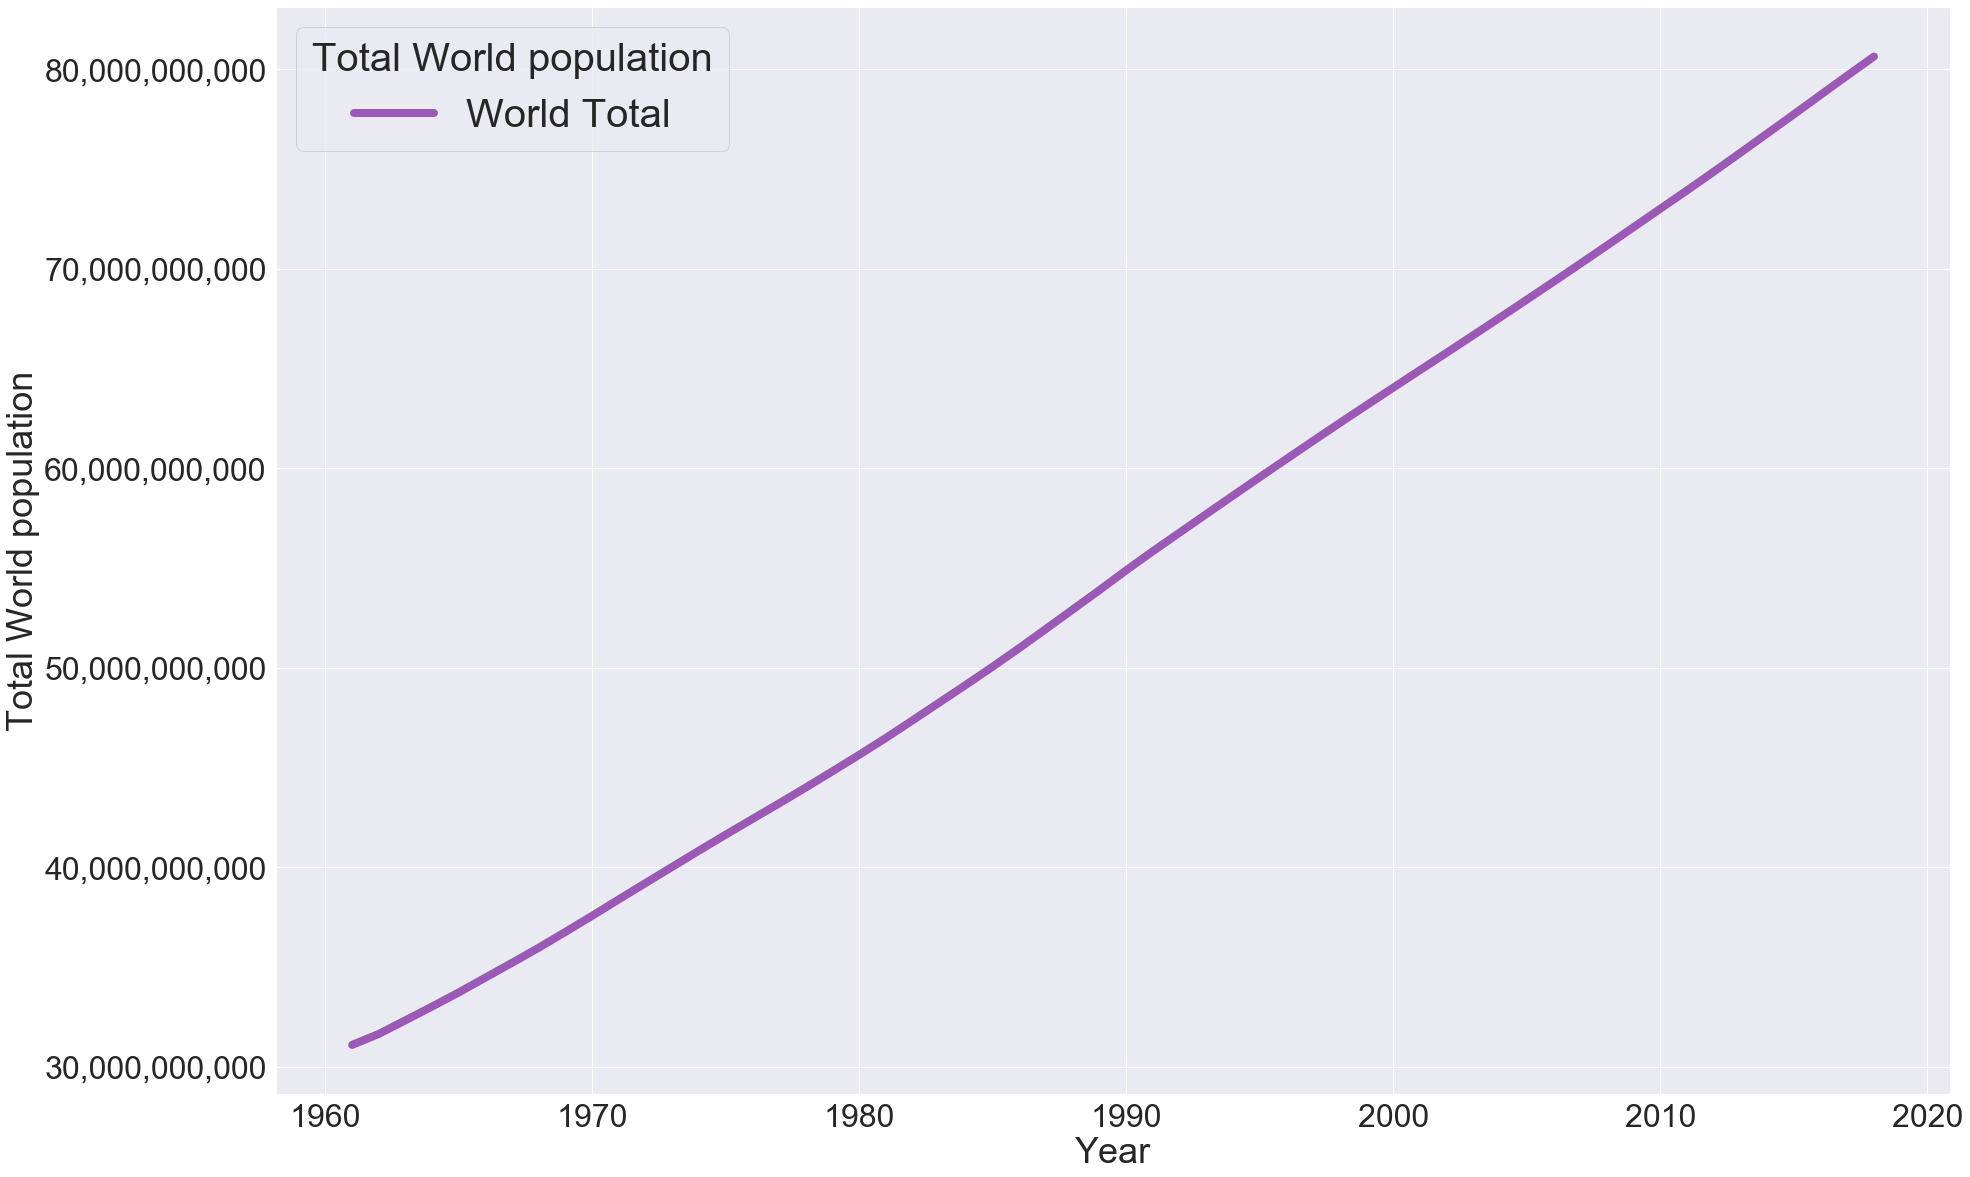

In [26]:
fig, ax = plt.subplots(figsize=(30,20))
Fdf.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Total World population", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total World population', fontsize=36)

* B)

In [27]:
dfr = pd.read_excel(pathout + 'Datapopularionwb.xls', sheet_name="Metadata - Countries", skiprows=1)

dfr

In [28]:
dfr = dfr.rename(columns={'ABW':'Country Code'})

dfr

In [29]:
result = pd.merge(df, dfr, on='Country Code')

result

In [30]:
new_result = result.drop(['Country Name','Country Code','Indicator Name','Indicator Code','High income','Unnamed: 3','Aruba'], axis=1)

In [31]:
new_result= new_result[[col for col in new_result.columns if str(col).startswith('2019.0')==False]]

In [32]:
new_result = new_result.T

new_result

In [33]:
new_result.rename(index={'Latin America & Caribbean':'Year'},inplace=True)

In [34]:
newheaders = new_result.iloc[59]
new_result  = pd.DataFrame(new_result.values[0:59], columns=newheaders)

In [35]:
new_result= new_result[[col for col in new_result.columns if str(col).startswith('NaN')==False]]

new_result

In [36]:
new_result.to_excel("Resultados.xlsx")

In [37]:
set(new_result.columns.to_list())

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa',
 nan}

In [38]:
new_result['East Asia & Pacific Total'] = new_result['East Asia & Pacific'].sum(axis=1)
new_result['Europe & Central Asia Total'] = new_result['Europe & Central Asia'].sum(axis=1)
new_result['Latin America & Caribbean Total'] = new_result['Latin America & Caribbean'].sum(axis=1)
new_result['Middle East & North Africa Total'] = new_result['Middle East & North Africa'].sum(axis=1)
new_result['North America Total'] = new_result['North America'].sum(axis=1)
new_result['South Asia Total'] = new_result['South Asia'].sum(axis=1)
new_result['Sub-Saharan Africa Total'] = new_result['Sub-Saharan Africa'].sum(axis=1)



In [39]:
Final_results = new_result.drop(['East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'], axis=1)

Final_results

In [40]:
Final_results = Final_results.loc[:, Final_results.columns.notnull()]

Final_results

In [41]:
Final_results.index=Fdf.index

In [42]:
Final_results

Year,East Asia & Pacific Total,Europe & Central Asia Total,Latin America & Caribbean Total,Middle East & North Africa Total,North America Total,South Asia Total,Sub-Saharan Africa Total
0,,,,,,,
1960.0,3.811949e+10,3.828843e+10,9.013997e+09,2.209269e+09,5.958732e+08,4.582716e+09,1.090719e+10
1961.0,3.823847e+10,3.873215e+10,9.263476e+09,2.269298e+09,6.060225e+08,4.679518e+09,1.116322e+10
1962.0,3.875995e+10,3.919070e+10,9.520582e+09,2.331954e+09,6.155958e+08,4.779956e+09,1.142984e+10
1963.0,3.969931e+10,3.965342e+10,9.784212e+09,2.396133e+09,6.247611e+08,4.883987e+09,1.170688e+10
1964.0,4.062500e+10,4.011225e+10,1.005223e+10,2.462694e+09,6.337887e+08,4.991547e+09,1.199394e+10
1965.0,4.158954e+10,4.055804e+10,1.032353e+10,2.531365e+09,6.420933e+08,5.102585e+09,1.229087e+10
1966.0,4.268069e+10,4.094738e+10,1.059770e+10,2.602071e+09,6.499770e+08,5.217153e+09,1.259781e+10
1967.0,4.373624e+10,4.132651e+10,1.087474e+10,2.676344e+09,6.575280e+08,5.335269e+09,1.291547e+10
1968.0,4.480640e+10,4.169100e+10,1.115488e+10,2.751565e+09,6.645090e+08,5.456817e+09,1.324499e+10


Text(0, 0.5, 'Total Population')

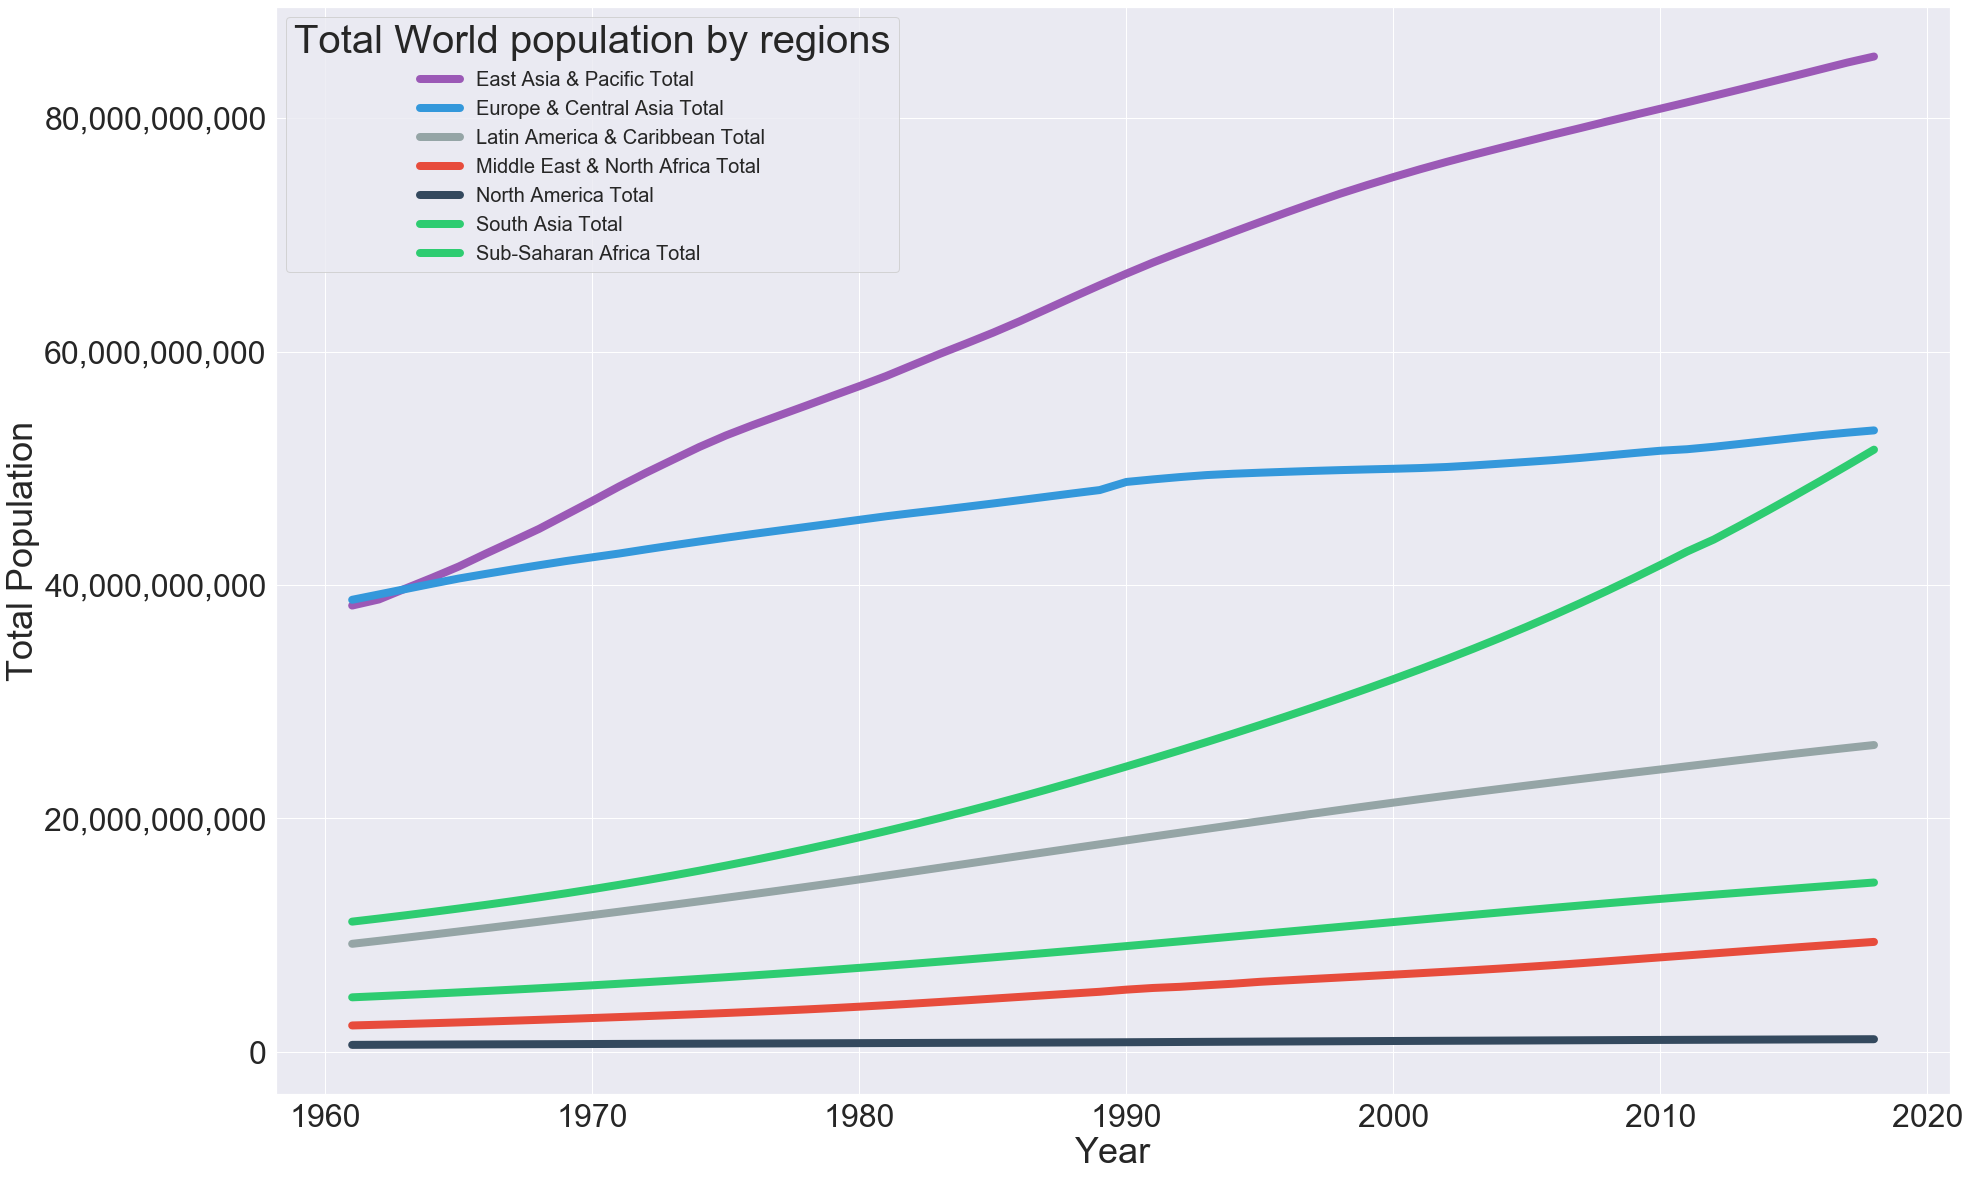

In [43]:
fig, ax = plt.subplots(figsize=(30,20))
Final_results.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total World population by regions", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Total Population', fontsize=36)

* # Punto 3

In [44]:
if not os.path.exists(pathout + 'Fertilitywb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Fertilitywb.xls')

In [45]:
if not os.path.exists(pathout + 'Mortalitywb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Mortalitywb.xls')

In [46]:
if not os.path.exists(pathout + 'Lifewb.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'Lifewb.xls')

In [47]:
fer = pd.read_excel(pathout + 'Fertilitywb.xls', sheet_name="Data", skiprows=3)
Mor = pd.read_excel(pathout + 'Mortalitywb.xls', sheet_name="Data", skiprows=3)
life = pd.read_excel(pathout + 'Lifewb.xls', sheet_name="Data", skiprows=3)

In [48]:
fer = fer.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
Mor = Mor.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
life = life.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)

In [49]:
fer= fer[[col for col in fer.columns if str(col).startswith('2019')==False]]
Mor= Mor[[col for col in Mor.columns if str(col).startswith('2019')==False]]
life= life[[col for col in life.columns if str(col).startswith('2019')==False]]

In [50]:
fer=fer.T
Mor=Mor.T
life=life.T

In [51]:
headersfer = fer.iloc[0]
fer = pd.DataFrame(fer.values[1:], columns=headersfer)

In [52]:
headersMor = Mor.iloc[0]
Mor  = pd.DataFrame(Mor.values[1:], columns=headersMor)

In [53]:
headerslife = life.iloc[0]
life  = pd.DataFrame(life.values[1:], columns=headerslife)

In [54]:
fer['World Total Fertility']=fer[:].mean(axis=1,skipna=True)
Mor['World Total Mortaliy']=Mor[:].mean(axis=1,skipna=True)
life['World Total Life Expectancy']=life[:].mean(axis=1,skipna=True)

In [55]:
Final_fer = fer[['World Total Fertility']]
Final_Mor = Mor[['World Total Mortaliy']]
Final_life = life[['World Total Life Expectancy']]

In [56]:
Final_fer.index=Fdf.index
Final_Mor.index=Fdf.index
Final_life.index=Fdf.index

Text(0, 0.5, 'Fertility Rate')

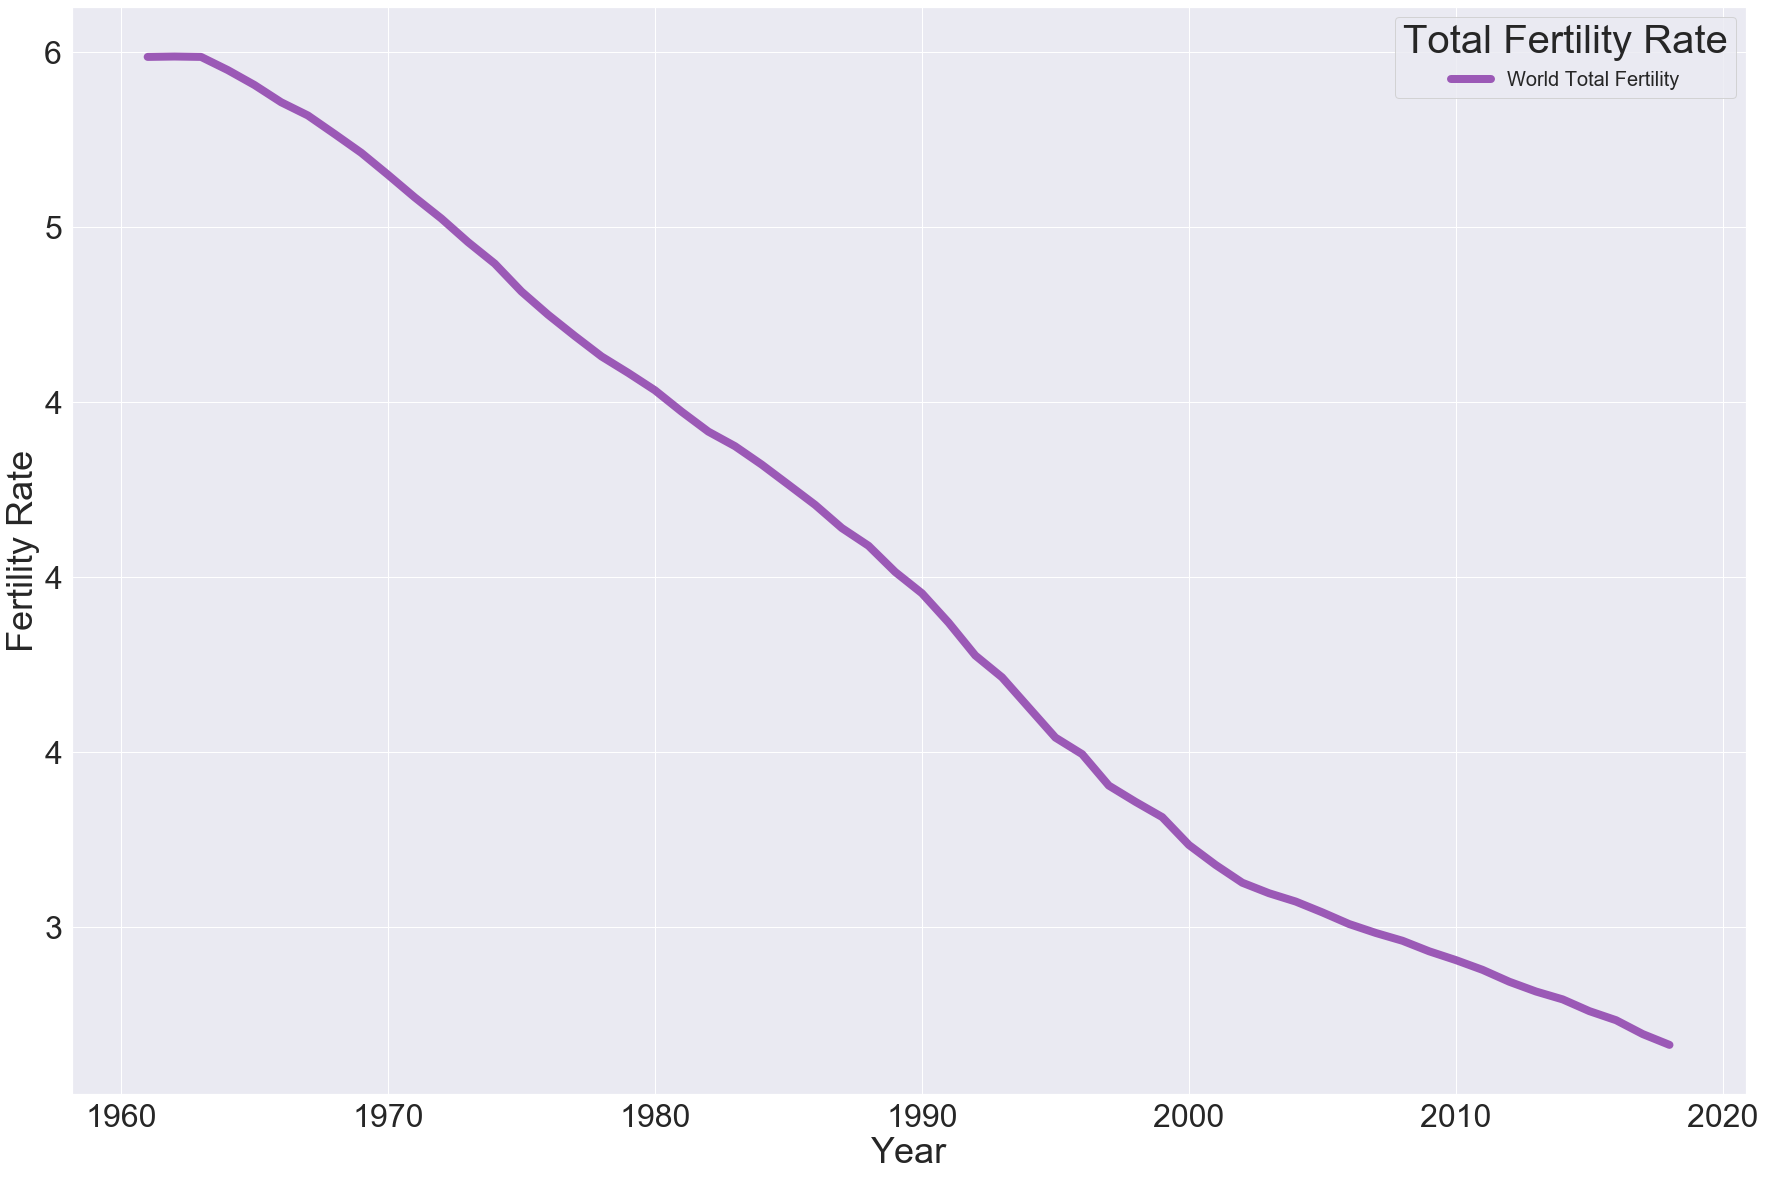

In [57]:
fig, ax = plt.subplots(figsize=(30,20))
Final_fer.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Fertility Rate", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Fertility Rate', fontsize=36)

Text(0, 0.5, 'Death Rate')

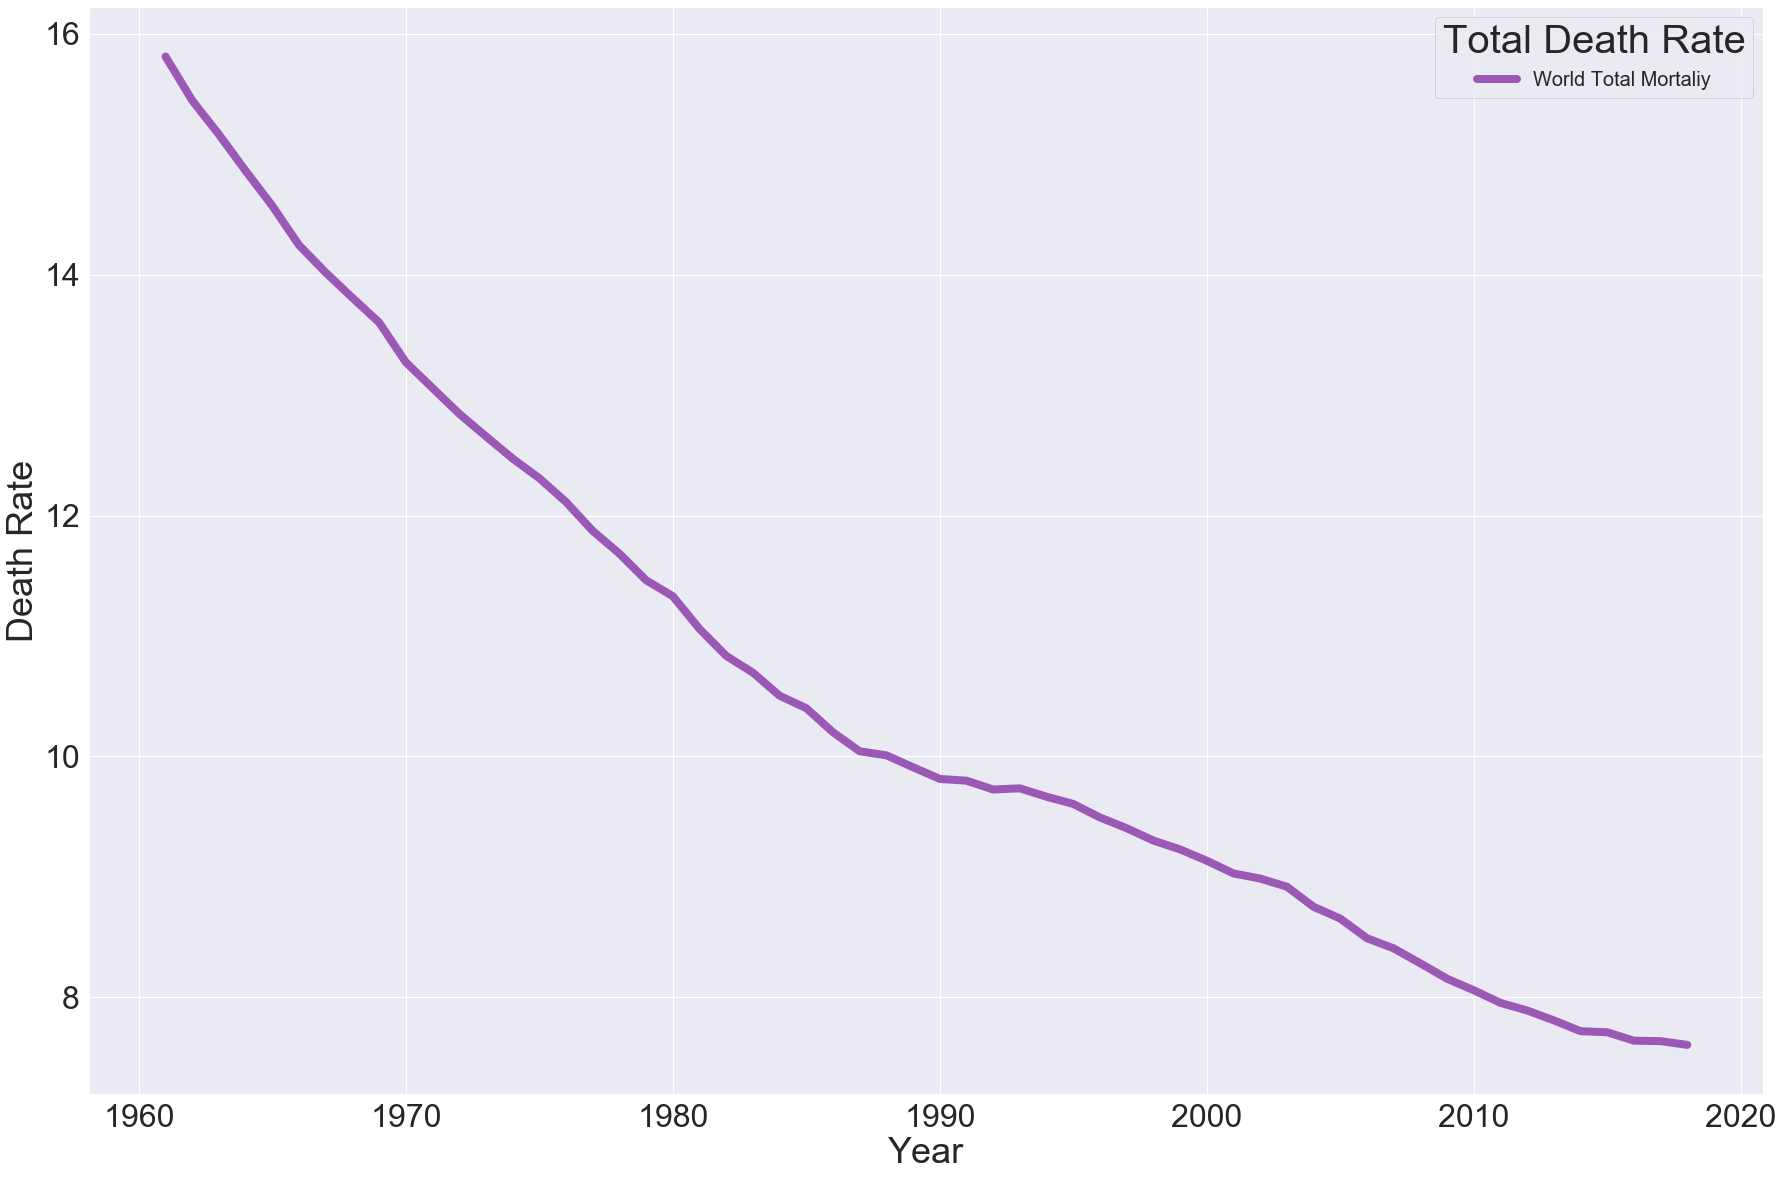

In [58]:
fig, ax = plt.subplots(figsize=(30,20))
Final_Mor.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Death Rate", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Death Rate', fontsize=36)

Text(0, 0.5, 'Life Expectancy')

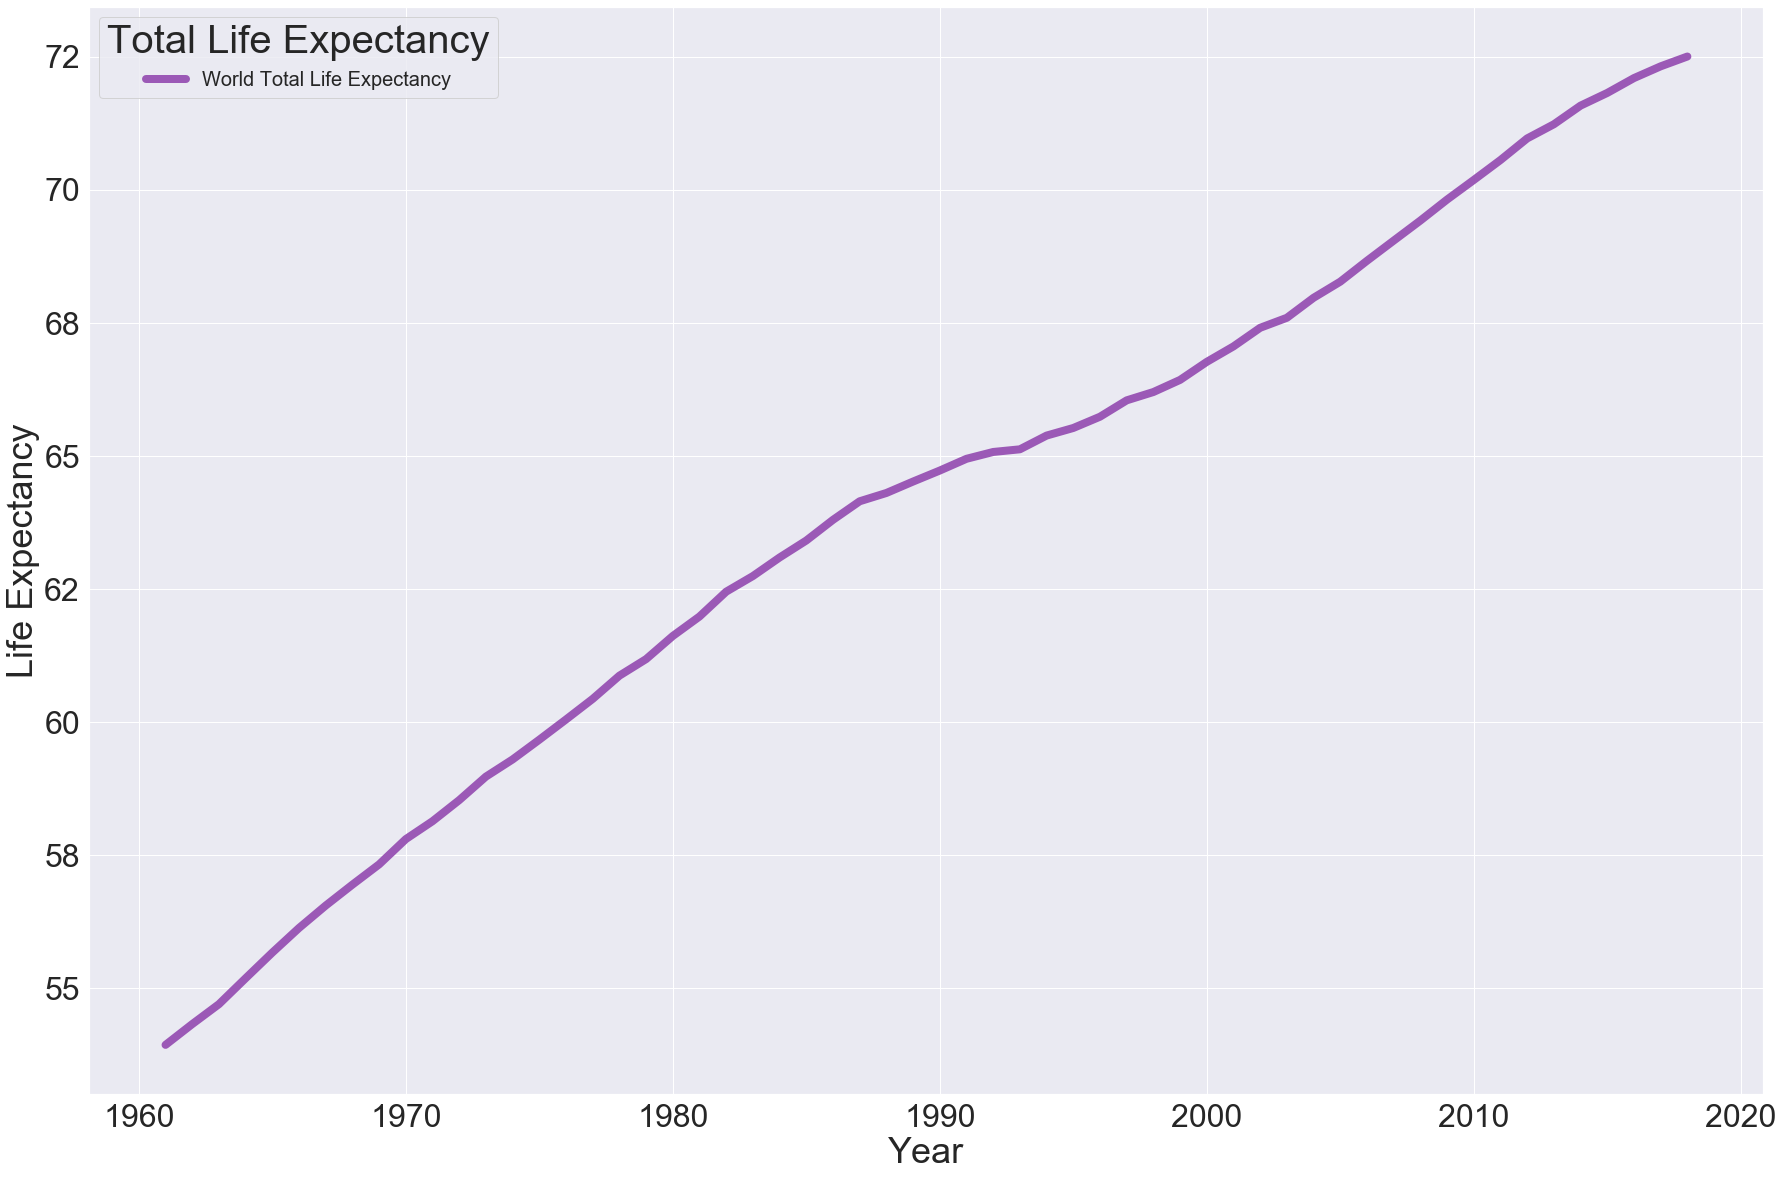

In [59]:
fig, ax = plt.subplots(figsize=(30,20))
Final_life.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Life Expectancy", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Life Expectancy', fontsize=36)

* # Punto 4

In [60]:
import glob

In [61]:
def leer_ins(path):
    filenames = glob.glob(path)
    return [(pd.read_fwf(i)) for i in filenames]    

In [ ]:
database = pd.read_csv('/Users/leonorsegura/Downloads/death_rates/Mx_5x1/AUS.Mx_5x1.txt', delimiter = ",", skiprows=2)